In [ ]:
import pandas as pd


DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
x = DF[['totalOrder','meanPriceEach','Country']]
y = DF[['customerType']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506, 1)
Test Data :  (4503, 3) (4503, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat_lr = Model_lr.predict(x_test)
y_hat_lr

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_lr)

array([[1877,  350],
       [ 113, 2163]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score_lr = accuracy_score(y_test, y_hat_lr)
print('accuracy_score : ', accuracy_score_lr)


accuracy_score :  0.8971796580057739


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
sns.barplot(Model_lr.feature_importances_,
            ['totalOrder','meanPriceEach','Country'])
plt.show()

In [ ]:
x = pd.DataFrame(feature_names, columns = ["feature"])
x["importance"] = pow(math.e, w)
x = x.sort_values(by = ["importance"], ascending=False)

ax =x.plot.bar(x=x, y=y)
plt.show()

NameError: ignored

In [ ]:
x = DF[['totalOrder','meanPriceEach','Country']]
y = DF[['customerType']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506, 1)
Test Data :  (4503, 3) (4503, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state=2045, max_depth = 15)
Model_dt.fit(x_train, y_train)

y_hat_dt = Model_dt.predict(x_test)
y_hat_dt

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_dt)

array([[2210,   17],
       [  20, 2256]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score_dt = accuracy_score(y_test, y_hat_dt)
print('accuracy_score : ', accuracy_score_dt)

accuracy_score :  0.9917832556073729


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


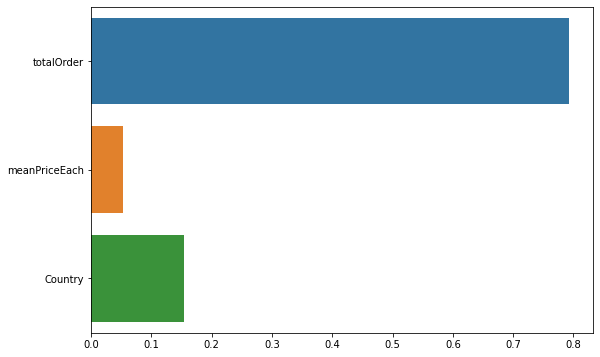

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
sns.barplot(Model_dt.feature_importances_,
            ['totalOrder','meanPriceEach','Country'])
plt.show()

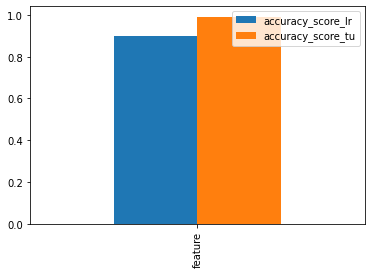

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, feature to feature
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accuracy_score_lr  1 non-null      float64
 1   accuracy_score_tu  1 non-null      float64
dtypes: float64(2)
memory usage: 24.0+ bytes


In [ ]:
x = pd.DataFrame({'accuracy_score_lr':accuracy_score_lr, 'accuracy_score_tu':accuracy_score_dt}, index=['feature'])
x[['accuracy_score_lr', 'accuracy_score_tu']].plot(kind='bar')
plt.show()
x.info()

In [ ]:
x = DF[['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','FY','Country']]
y = DF['customerType']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

Model_tu = RandomForestClassifier()

params = {'n_estimators':[100,500,1000, 3000, 10000],
          'max_features': [1,3,5,7,9,10],
          'max_depth': [1,10,50,100],
          'random_state':[2045]}

Train Data :  (10506, 10) (10506,)
Test Data :  (4503, 10) (4503,)


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_tu,
                       param_grid = params,
                       scoring = 'accuracy', 
                       refit = True,
                       n_jobs = -1)